# Capstone 2 Milestone Report
### Molly McNamara

In [1]:
import warnings
warnings.filterwarnings('ignore')
import json
import pandas as pd
%matplotlib inline 
import nltk
import string
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from mpl_toolkits.basemap import Basemap
from pandas import value_counts

### Introduction

Net neutrality is defined as “the principle that Internet service providers should enable access to
all content and applications regardless of the source, and without favoring or blocking particular
products or websites.” In the United States the Federal Communications Commission (FCC) has
for several years classified the internet as a telecommunications service in order to protect net
neutrality. Recently this order has been rescinded and a measure of disapproval is expected to be
voted upon in the US Senate.

Twitter is an online news and social media platform with approximately 330 million active users.
Given that users of Twitter are by its very nature users of internet services, sentiment analysis of
tweets could provide a strong case for lawmakers trying to understand the public consensus on
the subject or how their constituents wish the issue to be handled. The state of Montana, for
example, has already enacted its own legal protections to force net neutrality from providers
contracted with the state and the state of New York is expected to make similar provisions. 

By providing a detailed analysis of current tweets on the subject, this information could be used by a political lobbying company to persuade state and national representatives to vote according to the position of the voters they represent.

### The Data

The primary dataset was collected from [Twitter](http://www.twitter.com) using Python and the Tweepy app to gather all tweets with the search terms #NetNeutrality and Net Neutrality from January 22, 2018 through February 13, 2018 (and ongoing daily downloads are added). This includes not only the text of the tweets but also user information such as username, location and any profile description.  The data collection code can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/2nd%20Capstone%20Project/Code/Capstone%202%20Import%20of%20Twitter%20Data%20redacted.ipynb).

### Data Wrangling

The Twitter json files were imported into iPython notebook and appended to one another. The format of the data in the json structure was evaluated to determine which fields to extract for this analysis.  A dataframe was generated with the selected features from the Twitter json files.  As of the tweets collected on February 13, 2018, the dataframe consisted of 285,926 observations wth 13 features. Duplicate tweet IDs were removed, resulting in a dataframe of 262,891 observations.  The tweet date field was converted to a datetime object.  The tweet text was cleaned and prepared for analysis.

All data wrangling steps for this dataset can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/2nd%20Capstone%20Project/Code/Capstone%202%20Data%20Wrangling%20and%20Exploratory%20Data%20Analysis.ipynb).

In [2]:
tweet_files = ['#NetNeutrality/#NetNeutrality_2018-01-22.json', 'net/net_2018-01-22.json', '#NetNeutrality/#NetNeutrality_2018-01-23.json', 'net/net_2018-01-23.json', '#NetNeutrality/#NetNeutrality_2018-01-24.json', 'net/net_2018-01-24.json', '#NetNeutrality/#NetNeutrality_2018-01-25.json', 'net/net_2018-01-25.json', '#NetNeutrality/#NetNeutrality_2018-01-26.json', 'net/net_2018-01-26.json', '#NetNeutrality/#NetNeutrality_2018-01-27.json', 'net/net_2018-01-27.json', '#NetNeutrality/#NetNeutrality_2018-01-28.json', 'net/net_2018-01-28.json', '#NetNeutrality/#NetNeutrality_2018-01-29.json', 'net/net_2018-01-29.json', '#NetNeutrality/#NetNeutrality_2018-01-30.json', 'net/net_2018-01-30.json', '#NetNeutrality/#NetNeutrality_2018-01-31.json', 'net/net_2018-01-31.json', '#NetNeutrality/#NetNeutrality_2018-02-01.json', 'net/net_2018-02-01.json', '#NetNeutrality/#NetNeutrality_2018-02-02.json', 'net/net_2018-02-02.json', '#NetNeutrality/#NetNeutrality_2018-02-03.json', 'net/net_2018-02-03.json', '#NetNeutrality/#NetNeutrality_2018-02-04.json', 'net/net_2018-02-04.json', '#NetNeutrality/#NetNeutrality_2018-02-05.json', 'net/net_2018-02-05.json', '#NetNeutrality/#NetNeutrality_2018-02-06.json', 'net/net_2018-02-06.json', '#NetNeutrality/#NetNeutrality_2018-02-07.json', 'net/net_2018-02-07.json', '#NetNeutrality/#NetNeutrality_2018-02-08.json', 'net/net_2018-02-08.json', '#NetNeutrality/#NetNeutrality_2018-02-09.json', 'net/net_2018-02-09.json', '#NetNeutrality/#NetNeutrality_2018-02-10.json', 'net/net_2018-02-10.json', '#NetNeutrality/#NetNeutrality_2018-02-11.json', 'net/net_2018-02-11.json', '#NetNeutrality/#NetNeutrality_2018-02-12.json', 'net/net_2018-02-12.json', '#NetNeutrality/#NetNeutrality_2018-02-13.json', 'net/net_2018-02-13.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))
def populate_tweet_df(tweets):
    df = pd.DataFrame()
    df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets))                
    df['tweet_date'] = list(map(lambda tweet: tweet['created_at'], tweets))
    df['user_id'] = list(map(lambda tweet: tweet['user']['id'], tweets))                      
    df['screen_name'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets))                
    df['name'] = list(map(lambda tweet: tweet['user']['name'], tweets))               
    df['description'] = list(map(lambda tweet: tweet['user']['description'], tweets))                
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
    df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))
    df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))               
    df['user_location'] = list(map(lambda tweet: tweet['user']['location'] 
                        if tweet['place'] != None else '', tweets))
    df['tweet_location'] = list(map(lambda tweet: tweet['place']['full_name'] 
                        if tweet['place'] != None else '', tweets))
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    return df
df = populate_tweet_df(tweets)
df = df.drop_duplicates(["tweet_id"])
df['tweet_date'] = pd.to_datetime(df['tweet_date'],  errors='raise')
df.head()

,tweet_id,tweet_date,user_id,screen_name,name,description,text,retweet_count,favorite_count,user_location,tweet_location,long,latt
0,955590854734958592,2018-01-22 23:59:48,813084079180709888,SamanthaRblxYT,sam🦄,I LOVE MA GURPS!! @YourLilPotato & @Little_Sno...,RT @MatthewBender9: #NetNeutrality How it’s go...,1291,0,,,NaN,NaN
1,955590762271526912,2018-01-22 23:59:26,830465545275371521,margeholmes6162,Marj,,RT @DeadpoolResists: Montana becomes first sta...,475,0,,,NaN,NaN
2,955590754033946634,2018-01-22 23:59:24,3246707126,AllMghtyLantern,AllMightyLantern,"Lover of all things comics, games, animation, ...",RT @fightfortheftr: We are ONE VOTE AWAY from ...,839,0,,,NaN,NaN
3,955590534789124096,2018-01-22 23:58:32,786420072730333184,pyrrpro55,Pyrrhis Productions,Formerly Simulation Studios!,RT @freepress: Don't be fooled: Your activism ...,35,0,,,NaN,NaN
4,955590495950041088,2018-01-22 23:58:22,1603164476,bzaenglein,Barbara Zaenglein,#Resist #Notmypresident. #NetNeutrality #Pence...,RT @freepress: We're suing the FCC to save #Ne...,36,0,,,NaN,NaN


In [4]:
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df['text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)

### Initial Findings

The tweets range from January 22 through February 13, 2018.

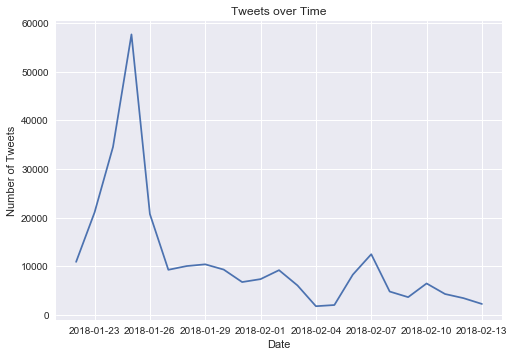

In [3]:
df.groupby(df['tweet_date'].dt.date).size().plot()
plt.title('Tweets over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

The most frequent terms in the tweet text were graphed.  Not surprisingly net and neutrality was the top words (especially considering it was the term for which the tweets were searched and collected). Interestingly the US fast food restaurant Burger King also landed in the top words, due to the release of [this video](https://www.youtube.com/watch?v=ltzy5vRmN8Q) about net neutrality on January 24, 2018.

The top terms were also visualized with a word cloud.

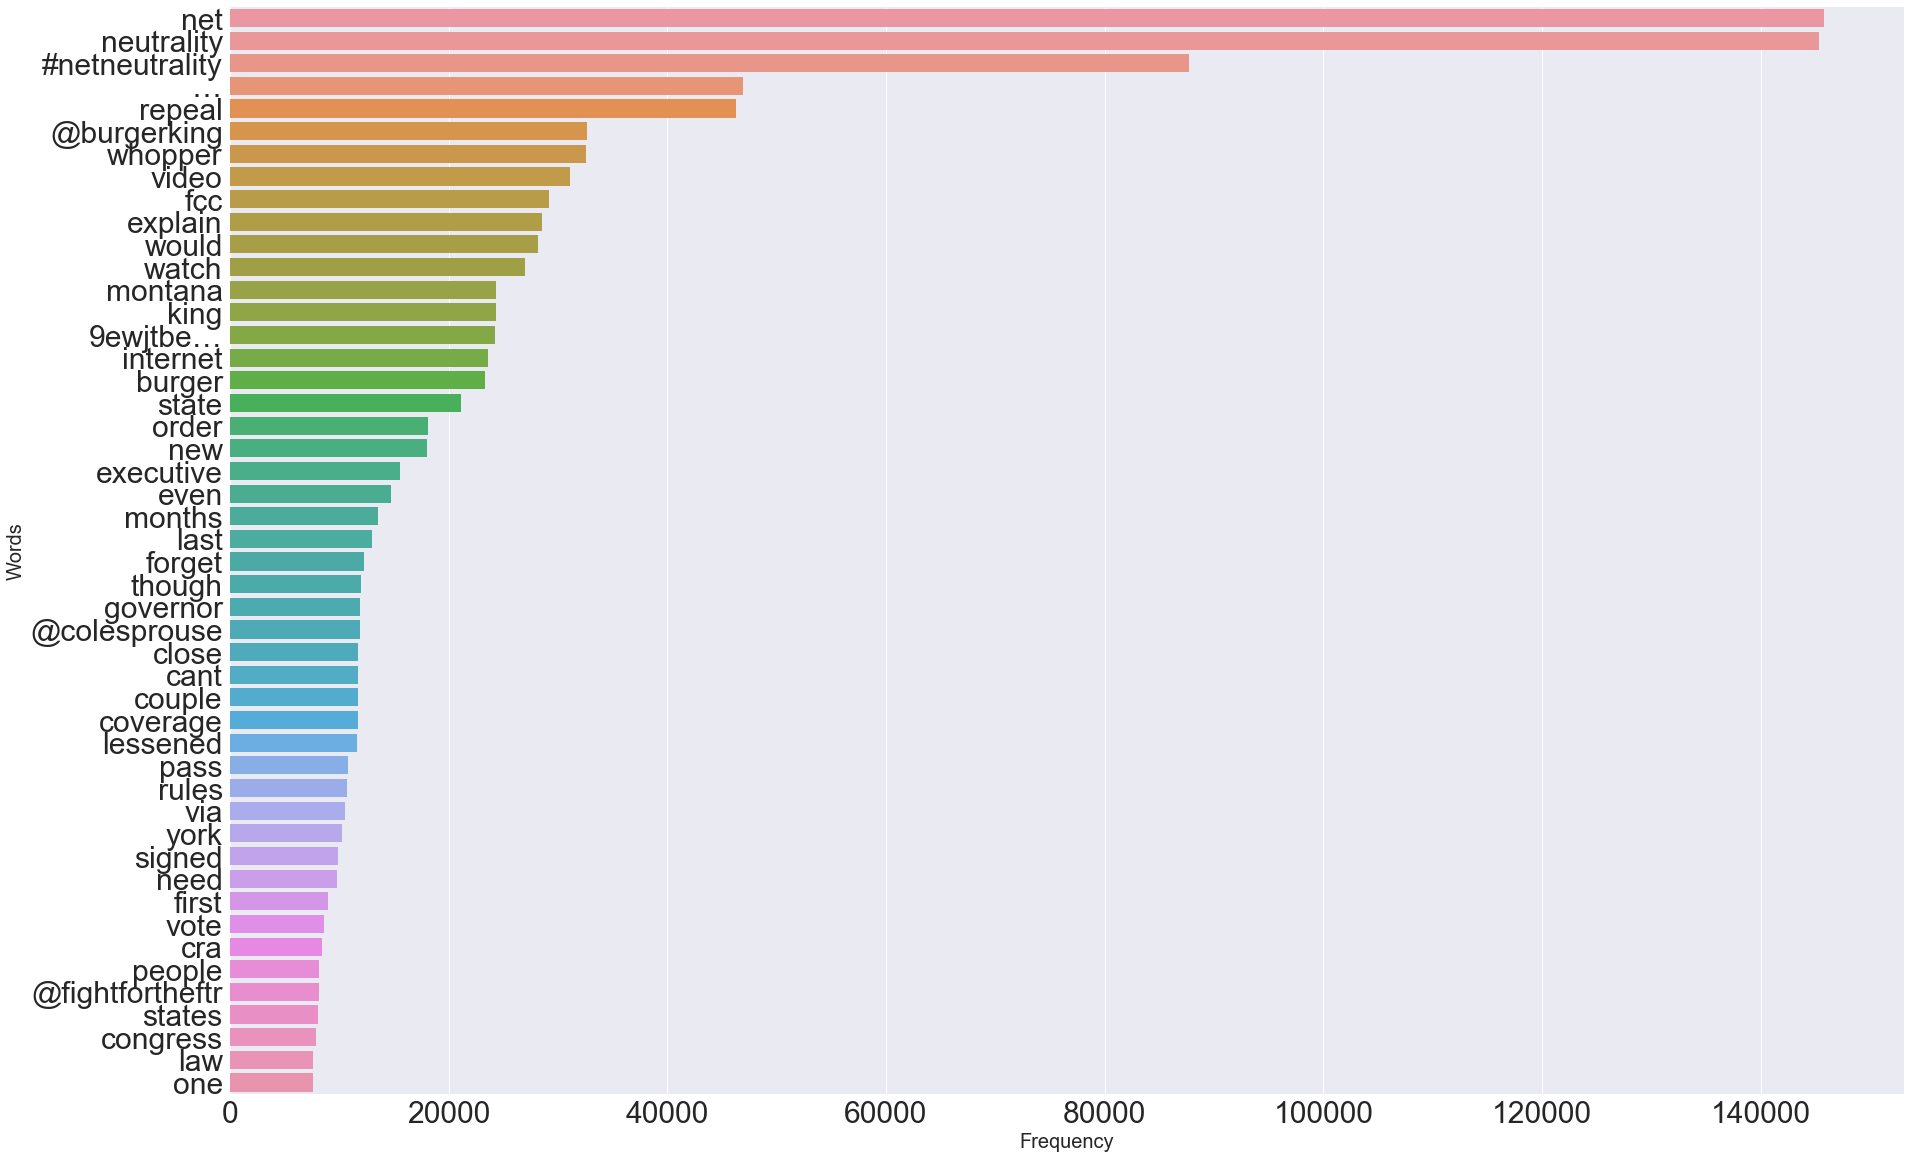

In [6]:
rslt = pd.DataFrame(Counter(words).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt = rslt.iloc[2:] 
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x='Frequency', data=rslt)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

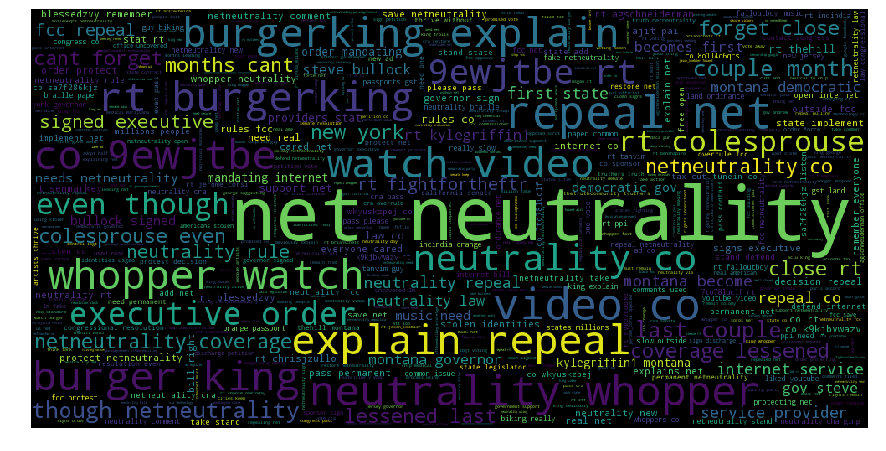

In [7]:
wordcloud = WordCloud(width = 1000, height = 500, max_words = 500).generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word co-occurences were also evaluated to identify common terms used in the set of tweets.

In [8]:
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words, 2)
finder.apply_freq_filter(5)
for bigram in finder.nbest(bigram_measures.likelihood_ratio, 20):
    print(bigram)

('net', 'neutrality')
('burger', 'king')
('would', 'explain')
('watch', 'video')
('whopper', 'watch')
('@burgerking', 'would')
('explain', 'repeal')
('executive', 'order')
('coverage', 'lessened')
('cant', 'forget')
('forget', 'close')
('lessened', 'last')
('last', 'couple')
('couple', 'months')
('months', 'cant')
('co', '9ewjtbe…')
('even', 'though')
('@colesprouse', 'even')
('repeal', 'net')
('video', 'co')


Top users were graphed as well by number of tweets in the dataset.

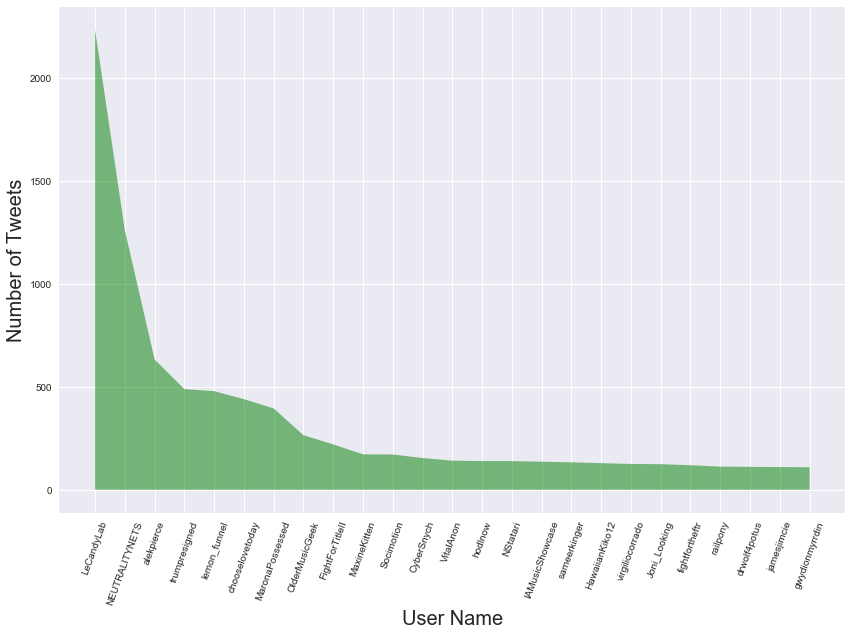

In [14]:
user_counts = df.screen_name.value_counts()[:25]
fig, ax = plt.subplots(1, figsize=(12, 9))
x = np.arange(len(user_counts.index))
ax.stackplot(x, user_counts.values, colors='g', alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels(user_counts.index, fontsize=10, rotation=70)
ax.grid(color='w', linestyle='-', linewidth=1)
ax.set_xlabel("User Name",fontsize=20)
ax.set_ylabel("Number of Tweets",fontsize=20)
plt.tight_layout()
plt.show()

### Supplemental Data

A [supplemental dataset](https://www.kaggle.com/jeffkao/proc_17_108_unique_comments_text_dupe_count) obtained from Kaggle contains 2,955,182 public comments to the FCC on net neutrality during a 6 month comment period in 2017.  Interestingly, [analysis of this data](https://hackernoon.com/more-than-a-million-pro-repeal-net-neutrality-comments-were-likely-faked-e9f0e3ed36a6) has shown that a substantial proportion of these comments are fake pro-repeal spam.  

This could prove especially important for the analysis of Twitter data, compared to FCC data, to demonstrate to legislators, via the lobbying organization client, that in fact the public sentiment is not the same as believed from the comments submitted to the FCC.

A preliminary evaluation of most frequent terms and word co-occurences for this dataset does show some differences from the Twitter data.

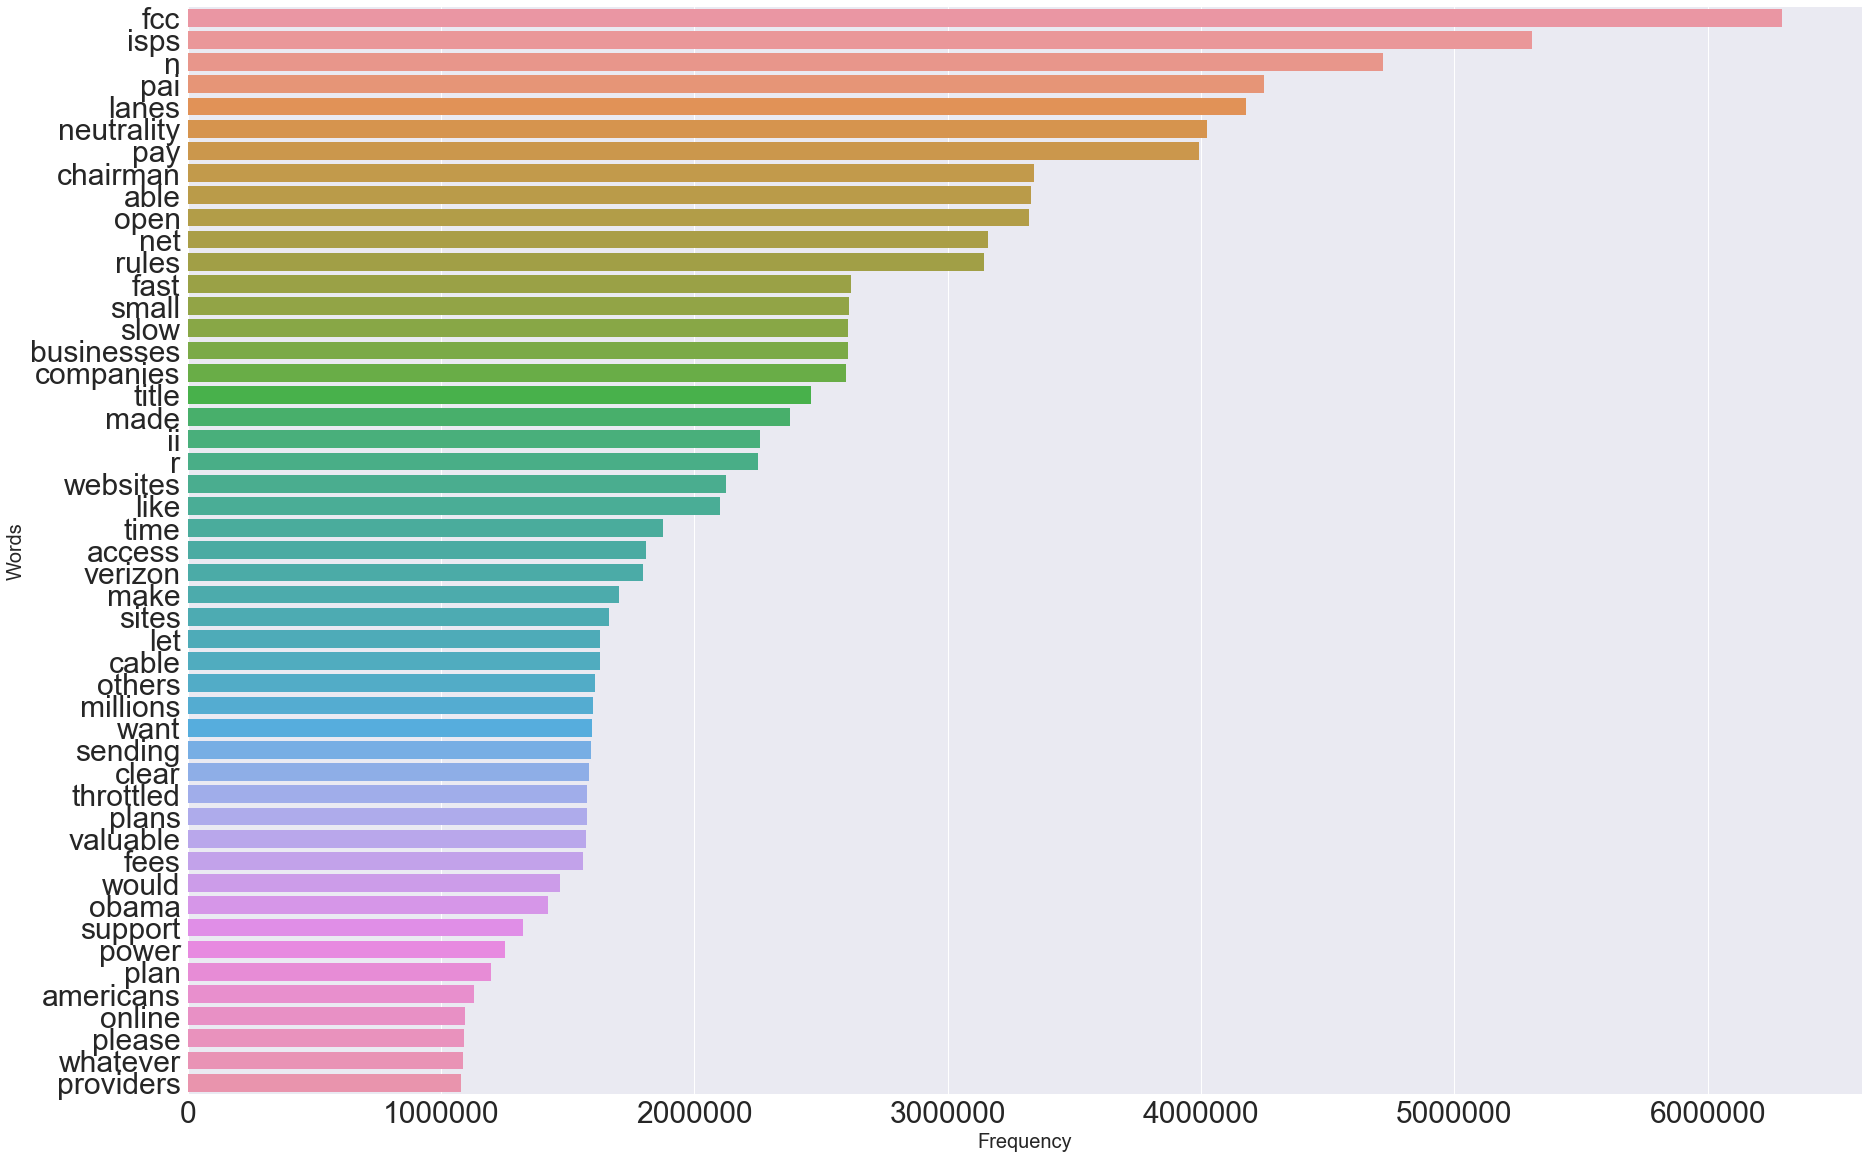

In [15]:
fcc = pd.read_csv('~/Desktop/proc_17_108_unique_comments_text_dupe_count.csv', index_col='docid')
fcc = fcc.drop_duplicates(["text_data"])
fccwords = (fcc['text_data']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split())
rslt4 = pd.DataFrame(Counter(fccwords).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt4 = rslt4.iloc[1:]
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt4.index, x='Frequency', data=rslt4)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

In [16]:
finder2 = BigramCollocationFinder.from_words(fccwords, 2)
finder2.apply_freq_filter(5)
for bigram in finder2.nbest(bigram_measures.likelihood_ratio, 20):
    print(bigram)

('net', 'neutrality')
('chairman', 'pai')
('title', 'ii')
('fast', 'lanes')
('made', 'clear')
('small', 'businesses')
('league', 'legends')
('members', 'congress')
('famous', 'sky')
('admitted', 'introduce')
('rules)', 'extremely')
('serious', 'problem')
('abysmal', 'customer')
('marketplace', 'enabled')
('prices', 'abysmal')
('game', 'league')
('blogs', 'nonprofits')
('nonprofits', 'artists')
('created', '5')
('popular', 'game')


### Analysis Strategy

The next steps is to perform more extensive text and sentiment analysis of both sets of data in order to develop enough information for the theoretical client to use in lobbying representatives on net neutrality policy.